<div class="licence">
<span>Licence CC BY-NC-ND</span>
<span>Valérie Roy</span>
</div>

<img src="media/ensmp-25-alpha.png" />

Vous avez découverts les tableaux `numpy.ndarray` dont nous vous redonnons quelques méthodes:

| les méthodes             | ce qu'elles font                                 |
|--------------------------|--------------------------------------------------|
| `np.ndarray.size`     | le nombre d'éléments du tableau                  |
| `np.ndarray.itemsize` | la taille en octet d'un élément                  |
| `np.ndarray.nbytes`   | la taille totale du tableau sous-jacent en octet |
| `np.ndarray.shape`    | la forme du tableau (tuple)                            |
| `np.ndarray.ndim`     | le nombre de dimensions du tableau               |
| `np.ndarray.dtype`    | le type des éléments                             |

Nous allons maintenant rapidement aborder le sujet de la mémoire sur laquelle les tableaux `numpy.ndarray` sont stockés.

In [1]:
import numpy as np

Un petit aparté vers ceux qui se demandent 
> à quoi cela peut bien me servir d'avoir une intuition de la manière dont la librarie `numpy` travaille en mémoire ?!

Une première raison: afin que vous preniez des décisions en connaissance de cause ou du moins en essayant de comprendre les conséquences de vos choix.

Une seconde raison: afin que vous ne soyez pas complètement dépourvus le jour où vos codes, en se complexifiant, deviendront beaucoup trop lents ou prendront trop d'espace mémoire pour traiter vos données ...

Une troisième raison: afin de vous familiariser avec l'informatique et comprendre des mécanismes sous-jacents qui expliquent les choix des concepteurs de libraries.

Une dernière raison, afin d'avoir une petite culture informatique technique bien formée pour ne jamais penser que c'est magique, incompréhensible ou trop compliqué !  
Donc si vous ne comprenez pas bien une notion, vous le dites !
et on vous l'explique

In [2]:
# une cellule pour définir le style de présentation 
# utilisé dans la suite pour les dessins de la mémoire

my_stylesheet = "<style> .memory {font-size: 180%; line-height: 1.2;}</style>"

from IPython.display import HTML
HTML(my_stylesheet)

# numpy et la mémoire

Reprenons notre matrice du notebook précédent:

In [3]:
matrice = [
    [1, 2, 3, 4, 5], 
    [6, 7, 8, 9, 10],
    [11, 12, 13, 14, 15],
    [16, 17, 18, 19, 20]
]
mat = np.array(matrice)
mat

array([[ 1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10],
       [11, 12, 13, 14, 15],
       [16, 17, 18, 19, 20]])

Notre matrice contient 20 éléments:

In [4]:
mat.size

20

In [5]:
mat.dtype

dtype('int64')

Chaque élément est codé sur un `numpy.int64` et occupe donc 8 octets:

In [6]:
mat.itemsize

8

Donc la mémoire qu'occupe la matrice en nombre d'octets est $20 \times 8$:

In [7]:
mat.nbytes # byte = otet

160

Nous allons maitenant nous intéresser à la manière dont est représentée cette mémoire dans l'ordinateur lorsque la matrice est créée.

## organisation de la mémoire des tableaux

Lisons le help (en faisant ```help(np.ndarray)```  ou directement  ```np.ndarray?``` dans un notebook), il vous dit que votre `np.ndarray` est un tableau:
   1. **multidimensionnel**
   1. **homogène**
   1. d'éléments de **taille fixe**
   1. et que les tableaux doivent être construits en utilisant les méthodes `np.array`,`np.zeros` ou `np.empty`

Bon déjà que les tableaux soient **multidimensionnel**s ça nous rassure: ils sont là pour cela !

Qu'on les crée avec les méthodes `np.array`,`np.zeros` ou `np.empty`, on l'a vu.

Mais que veut bien dire que les tableaux sont homogènes ? Une idée ? Dans les exemples que nous avons vus ?

Vous avez commencé à vous en rendre compte avec les tableaux que nous avons construits. Ce qui est homogène c'est le type des éléments. Toutes les cases du tableau ayant le même type, elles occupent la même taille en mémoire.

Et que veut-dire que tous les éléments sont de **taille fixe** ?

Ca veut dire qu'une fois le tableau créé, vous n'allez pas pouvoir modifier la taille de ses éléments (la place sur laquelle chaque élément est stocké en mémoire). Si vous avez besoin de modifier la taille des éléments que contient un tableau, vous devez faire un nouveau tableau. On y revient bientôt.

A quoi servent toutes ces restrictions ?

Vous avez là les ingrédients qui permettent à `numpy` d'être très rapide dans sa manipulation de tableaux !

### les secrets de la rapidité des tableaux `numpy`  (avancé mais important)

Quels sont les secrets d'un code rapide sur des tableaux ? Des idées ? C'est un peu difficile parce qu'on doit mettre (un peu) les mains dans le cambouis (ici la mémoire) et mais vous pouvez proposer des idées ! J'en vois déjà un:

#### premier secret (*offset*)

C'est la possibilité quand on est sur un élément d'un tableau de passer très rapidement à un autre élément du même tableau.

Comment fait-on cela ?

Et bien si toute la zone mémoire du tableau est composée d'un unique block mémoire continu  
(c-à-d si les cases du tableaux sont contiguës en mémoire) ...  

passer d'une case à une autre (d'un élément à un autre) se fait alors grâce à un simple décalage - appelé *offset*(\*)  
et les ordis font ca super super vite !



(\*) Je plagie Wikipédia: *l'offset désigne une adresse de manière relative. C'est une valeur entière représentant le déplacement en mémoire nécessaire, par rapport à une adresse de référence, pour atteindre une autre adresse. Autrement dit, l'offset est la distance séparant deux emplacements mémoire.*

Voici des cases mémoire contiguës en mémoire qui forment un tableau.

<div class="memory"> 

```
☐☐☐☐☐☐☐☐☐☐☐☐☐☐☐☐☐☐☐☐☐☐☐☐☐☐☐☐☐☐
```
<div>

Voici des cases mémoire un peu partout (pour tenter de décrire le type de fragmentation qu'on obtient quand on utilise des types de base de Python, comme par exemple une liste de listes)

<div class="memory">

```
...☐.......☐..☐....☐...  
☐....☐.....☐.....☐.....  
..☐...☐.....☐......☐...  
☐.....☐.......☐...☐....
```

</div>

L'ordi va se déplacer beaucoup plus rapidement pour passer d'un élément à un autre  
si les éléments sont continuës  
que si les éléments du tableau sont dissiminés un peu partout dans la mémoire  
(comme c'est le cas dans certaine stuctures de données, par exemple les listes chaînées).

Et pour cela il faut que la taille des éléments du tableau soit fixe.

#### second secret (*pas d'indirection*)

Un second secret, c'est que `numpy` quand il arrive dans une case du tableau: il y trouve la valeur qu'il cherche   
(on parle là de nos exemples avec des nombres).

Quelques mots sur les listes Python pour ceux qui sont avancés:

Les listes Python sont en fait codées sous la forme de tableaux (i) qui peuvent changer de taille, (ii) dont les éléments sont de type hétérogène, (ii) où vous pouvez modifier ou rajouter un élément de n'importe quel type sans que les autres éléments ne soient touchés...

En informatique, un tableau est une zone mémoire qui est continue en mémoire, toujours. Voila un exemple de tableau de 3 cases:

In [8]:
t3 = [ 1, True, np.pi]
t3[1] = 12345678235234501256848345678901234567890264378034
t3

[1, 12345678235234501256848345678901234567890264378034, 3.141592653589793]

Donc, si les cases d'un tableau en informatique ont toujours la même taille, comment vais-je y "*mettre*"  des élément hétérogènes ? Des idées ?

Oui nous allons utiliser des adresses ! on va mettre dans la case, l'adresse de l'endroit où se trouve l'élément en mémoire.

Toutes les adresses sont codées sur le même nombre d'octets. Combien ? J'espère 8 octets (64 bits) ! heu vous avez un ordi 32-bits ... c'est qui qui vous l'a prêté ?

Quand on arrive sur un élément et qu'on *trouve* sur une adresse, pour y aller lire la valeur, nous n'avons pas un simple offset à faire mais bien une indirection et c'est beaucoup beaucoup plus long...

### taille fixe des éléments

Pour illustrer le fait que la taille des éléments est fixe dans un tableau `numpy`, vous allez faire un petit exercice: créer un tableau `numpy` de chaînes de caractères.

À vous de jouer. Voici une liste python des jours de la semaine. Construisez une `numpy.ndarray` avec cette liste.

Affichez le type que `numpy` a choisi comme type pour les éléments. Rappelez-vous tous les éléments vont-être du même type ! Donc toutes les chaînes de caractères vont avoir le même type.

In [9]:
les_jours = ['lundi', 'mardi', 'mercredi', 'jeudi', 'vendredi', 'samedi', 'dimanche']
type(les_jours[0])

str

In [10]:
# votre code ici (correction ci-dessous, ne pas regarder tout de suite !)

In [11]:
semaine = np.array(les_jours)
semaine.dtype

dtype('<U8')

Alors le (plus petit) type de donné que `numpy` a trouvé pour ce tableau est *'<U8'*.

Oublions `<`  
Que signifie `U` ...  une idée ? (sans regarder sur Internet, en réfléchissant dans votre tête)  
Oui *Unicode*. On en a déjà un.  
Et pour 8 ? Une idée ? (attention piège !)

Il faut compter le nombre de caractères des chaînes ... vous me suivez ?  
Quel est le nombre de caractères minimum sur nous permet d'écrire chacun des jours de la semaine ?  
Bingo c'est 8. Rien à voir avec un octet.

À vous de jouer.  
Essayez de remplacer un des jours du tableau par une chaîne de caractères qui comporte plus de 8 caractères ?   
genre `'lundi mais en plus long'`

In [12]:
# votre code ici

In [13]:
semaine[0] = 'lundi mais en plus long'

In [14]:
semaine

array(['lundi ma', 'mardi', 'mercredi', 'jeudi', 'vendredi', 'samedi',
       'dimanche'], dtype='<U8')

Que va-t-il se passer ?  
Oui ! `numpy` ne va bien sûr pas pouvoir stocker tous les caractères mais uniquement les 8 premiers caractères ...   
(taille fixe on vous a dit !)

Au passage vous venez de voir comment on accède à un élément d'un `np.ndarray` oui là c'est de dimension 1 donc on n'a qu'un seul index à donner!

Maintenant essayez de créer un tableau `np.ndarray` à partir d'une liste Python avec des éléments numériques de différents types.  
Mettez les entiers 127 et 128,  
le flottant `numpy.pi` (oui pour nous `np.pi` puisque nous avons importé `numpy` avec son petit nom `np`)   
et les booléens python True et False.

In [15]:
l = 127, 128, np.pi, True, False, 127 # quel est le type de l ? 

In [16]:
# votre code ici - solution ci-dessous

In [17]:
np.array(l)

array([127.        , 128.        ,   3.14159265,   1.        ,
         0.        , 127.        ])

Nous commencions à nous y attendre tout a été mis sous la forme de flottants (64 bits) !  
les entiers sont *127.* et *128.*  
`False` est *0.* et `True` est *1.*

Essayez maintenant de créer un tableau `np.ndarray` à partir de la même liste en imposant lors de la création que le type soit un `np.int8`

In [18]:
# votre code ici - solution ci-dessous

In [19]:
np.array(l, dtype=np.int8)

array([ 127, -128,    3,    1,    0,  127], dtype=int8)

Combien vaut 128 en entier signé sur 8 bits ? Bizarre n'est-il pas ! mais tout à fait normal ...  
on dépasse de `1` le plus grand entier (`127`) de notre codage (`8` bits) on passe au plus petit

Maintenant rajouter une chaîne de caractère dans la liste et créer un tableau sans donner de type puis en donnant le type `np.int16`

In [20]:
l = [127, 128, np.pi, True, False, 127, 'bonjour'] # trouvez l'intru...

In [21]:
# votre code ici (sans type)

In [22]:
np.array(l)

array(['127', '128', '3.141592653589793', 'True', 'False', '127',
       'bonjour'], dtype='<U32')

Qu'avez vous obtenu ? Oui tous les éléments ont été transformés en chaînes de caractères ... seul type commun.

Essayer d'imposer le type flottant à la création du tableau

In [23]:
# votre code ici avec le type

In [24]:
# solution
np.array(l, dtype=np.float)

/tmp/ipykernel_1902/3733325317.py:2: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  np.array(l, dtype=np.float)


ValueError: could not convert string to float: 'bonjour'

Qu'avez-vous eu ? Oui une erreur `ValueError` lorsque `numpy` a essayé de convertir 'bonjour' en un entier ... bon il arrive à faire les conversions évidentes et là il n'en trouve pas !

Il existe des types prédéfinis, regardez là: https://docs.scipy.org/doc/numpy/user/basics.types.html).

Ce qu'il faut en retenir :

* vous pouvez choisir entre `bool`, `int`, `uint` (entier non signé), `float` et `complex` ;
* ces types ont diverses tailles pour vous permettre d'optimiser la mémoire utilisée ;
* ces types existent en tant que tels (hors de tableaux).

## organisation de la forme des tableaux

Vous savez désormais que la mémoire qui stocke le tableau est un segment unidimensionnel continu de cases du même type,  
que la taille d'un tableau est fixe  
que la taille des éléments est fixe

Revoici des cases mémoire contiguës en mémoire qui forment un tableau

<div class="memory">

```
☐☐☐☐☐☐☐☐☐☐☐☐☐☐☐☐☐☐☐☐☐☐☐☐☐☐☐☐☐☐
```

</div>

Vous avez aussi vu que cette mémoire va être organisée (*indexée*) pour lui donner la forme d'un tableau multi-dimensionnel. Pour l'instant on a vu des matrices donc des tableaux de forme $(d_1, d_2)$. Mais un tableau peut naturellement prendre n'importe quelle dimension.

Prenons un tableau de dimension $(d_1, d_2, d_3, d_4)$. Le segment unidimensionnel continu fera donc $d_1 \times d_2 \times d_3 \times d_4$ cases de long.

Chaque case étant de la taille mémoire suffisante pour stocker le type demandé pour les éléments, par exemple 64 bits.

Dans cette multi-indexation, les deux dernières dimensions sont les *lignes* et les *colonnes* d'une matrice. Dans notre exemple il s'agit de $(d_3, d_4)$. 

Ainsi ici $d_2$ serait un nombre de matrices. On a des paquets de $d_2$ matrices. Et $d_1$ serait le nombre de fois où on a ces paquets de matrices.

Ici on aura $d_1$ paquets de $d_2$ matrices de $d_3$ lignes et $d_4$ colonnes.

Ainsi prendre  2 matrices de 3 lignes et 4 colonnes ferait une dimension (2, 3, 4) et ainsi de suite...

Pour les avancés, dans l'exemple de l'image en couleur, en encodage RGB, on voit que la dimension de l'image est (530, 800, 3).

C'est à dire que l'image et présentée comme 530 matrices de 800 lignes et 3 colonnes et non pas 3 matrices de 533 lignes et 800 colonnes ! Comme on s'y attendait (peut être)

Pourquoi ? Parce qu'en fait une image est plutôt vue comme une unique matrice où chaque élément (donc chaque pixel de l'image) a trois valeurs: une pour chacune des couleurs primaireset qu'il est préférable de rapprocher les 3 valeurs RGB de chaque pixel pour ne pas ralentir les calculs.

Maintenant créons un segment de, par exemple, 30 éléments. Et ne donnons pas de forme, juste la taille. On en profite pour réutiliser la fonction qui fait des tableaux de 1 (la bien-nommée `np.ones`, heu non y'a pas `np.twos` ... `np.threes`).

Pour les avancés. Pourquoi avoir une fonction dédiée aux tableaux de 1 ?

Parce que cela vous permet de créer très rapidement un tableau où tous les éléments ont la même valeur, il suffit de multiplier un tableau de 1 de la bonne forme par votre valeur, on y reviendra ... mais vous pouvez déjà essayer `np.ones(shape=(30,))*np.pi`, oh les 30 beaux $\pi$ !

In [25]:
seg = np.ones(shape=(30,)) # ou shape=30 et il comprend
seg

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

Quel est le type des éléments ? Une idée ? En bien si vous n'indiquez pas le type des éléments à ce genre de fonctions (comme `np.zeros`, `np.empty`, `np.ones`), elles prennent par défaut le type flottants sur 64 bits. Nous le vérifions:

In [26]:
seg.dtype

dtype('float64')

Donc nous voici avec un tableau dont la taille initiale est la suivante:

In [27]:
seg.shape

(30,)

Et dont la dimension est la suivante:

In [28]:
seg.ndim

1

Disons que cette forme est celle d'un vecteur *ligne*. Dans ce cas on n'a donc besoin que d'un seul index pour parcourir ce tableau (si on voulait le parcourir). On serait dans ce cas (où $o$ désigne l'offset par rapport au début de la mémoire du tableau; du coup bien sûr ici l'offset se confond avec l'indice)

<div class="memory">

```
☐☐☐☐☐☐☐☐☐☐☐☐☐☐☐☐☐☐☐☐☐☐☐☐☐☐☐☐☐☐
               ↑
```

</div>

$\;\;\;\;\;\;\;\;\;\;\;$ vecteur de 30 élements : ${0\leq i < 30} \;\;\;\;\;\; i = 15 \longrightarrow o = 15$

Et si nous voulions que ce tableau de 30 cases prenne une nouvelle forme: on ne veut plus le considérer comme un vecteur ligne mais comme, par exemple, une matrice avec 3 lignes et 10 colonnes ?

On a bien le même nombre d'éléments (30) dans les deux formes, simplement dans la seconde forme, on est en dimension 2. C'est à dire qu'on aura besoin de deux indices (un pour les lignes et un pour les colonnes) pour parcourir notre matrice (si on voulait la parcourir). On serait dans ce cas:


<div class="memory">

```
☐☐☐☐☐☐☐☐☐☐☐☐☐☐☐☐☐☐☐☐☐☐☐☐☐☐☐☐☐☐
↑
```

</div>


$\;\;\;\;\;\;\;\;\;\;\;$ matrice 3 x 10 : ${0\leq i < 3,\ 0 \leq j < 10} \;\;\;\;\;\; (i=0, j=0) \longrightarrow o=0$

Et bien `np.ndarray` comporte deux fonctions pour ré-indexer la mémoire unidimensionnelle sous-jacente.  
Ces fonctions sont `np.ndarray.reshape` et `np.ndarray.resize`.

### réindexer un `ndarray.reshape` et `ndarray.resize`

`np.ndarray.reshape` et `np.ndarray.resize` s'appliquent toutes les deux aux objets de type `np.ndarray` (ce sont des méthodes du type `np.ndarray`).

Quelle est leur différence ? Essayez de regarder leur help. Alors ? La voyez-vous ? Elle est petite...

Le help de `np.ndarray.resize` vous dit "*Change shape and size of array in-place*".

**in-place** signifie **dans l'objet** auquel la fonction est appliquée.

Le help de `np.ndarray.reshape` vous dit "*Returns an array containing the same data with a new shape.*"

Elle renvoie une nouvelle manière d'indexer votre tableau mais cette indexation travaille aussi (comme resize) sur la même mémoire sous-jacente.

Leur similitude ? Aucune des deux ne crée de nouveau `np.ndarray`.

Naturellement la taille du tableau initial doit correspondre à la taille du tableau re-structuré.

#### exemple avec ` numpy.resize`

In [29]:
seg.shape

(30,)

In [30]:
seg.resize((3, 10)) # vous voyez que l'application de la fonction resize à seg ne renvoie rien et modifie seg

In [31]:
seg.shape

(3, 10)

Ou plus simplement on l'affiche. On voit bien les 3 lignes de 10 éléments.

In [32]:
seg

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]])

#### exemple avec `numpy.reshape`

In [33]:
seg = np.ones(shape=30).reshape(3, 10) # vous voyez que reshape renvoie 
                                       # un nouvel objet avec une nouvelle forme
seg

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]])

### index et décalages

Parlons un peu de ce qu'on a appelé précédemment décalages ou offsets pour les relier à notre problème de forme.

Illustrons l'offset $o$ qu'il faut utiliser pour accéder à une case d'une matrice 3 x 10
<div class="memory">

```
☐☐☐☐☐☐☐☐☐☐☐☐☐☐☐☐☐☐☐☐☐☐☐☐☐☐☐☐☐☐
↑
```

</div>

$\;\;\;\;\;\;\;\;\;\;\;$ matrice 3 x 10 : ${0\leq i < 3,\ 0 \leq j < 10} \;\;\;\;\;\; (i=0, j=0) \longrightarrow o=0$

Si je suis sur un élément en début d'une ligne, pour passer directement à l'élément en début de la ligne suivante, combien me faudra-t-il *sauter*  d'éléments?

i.e. de combien me faudra-t-il me décaler sur mon segment unidimensionnel sous-jacent ?

Oui il faudra "sauter" 10 éléments et 10, on le connait ce chiffre ! c'est la valeur de la deuxième dimension de notre forme (le nombre de colonnes).

<div class="memory">

```
☐☐☐☐☐☐☐☐☐☐☐☐☐☐☐☐☐☐☐☐☐☐☐☐☐☐☐☐☐☐
          ↑
```

</div>

$\;\;\;\;\;\;\;\;\;\;\;$ matrice 3 x 10 : ${0\leq i < 3,\ 0 \leq j < 10} \;\;\;\;\;\; (i=i, j=0) \longrightarrow o=10$

Si je voulais passer de cet élément à celui situé 5 cases à sa droite, je dois simplement sauter 5 nouvelles cases

<div class="memory">

```
☐☐☐☐☐☐☐☐☐☐☐☐☐☐☐☐☐☐☐☐☐☐☐☐☐☐☐☐☐☐
               ↑
```

</div>
    
$\;\;\;\;\;\;\;\;\;\;\;$ matrice 3 x 10 : ${0\leq i < 3,\ 0 \leq j < 10} \;\;\;\;\;\; (i=1, j=5) \longrightarrow o=15$

Et donc la dernière colonne de la dernière ligne se trouve logiquement à la fin de la mémoire 


<div class="memory">

```
☐☐☐☐☐☐☐☐☐☐☐☐☐☐☐☐☐☐☐☐☐☐☐☐☐☐☐☐☐☐
                             ↑
```

</div>

$\;\;\;\;\;\;\;\;\;\;\;$ matrice 3 x 10 : ${0\leq i < 3,\ 0 \leq j < 10} \;\;\;\;\;\; (i=2, j=9) \longrightarrow o=29$

Et bien sûr si de là j'essaie d'avancer encore (parce que je me suis trompé de formule, ou que j'ai utilisé un $i$ ou un $j$ trop grand), eh bien j'arrive en dehors de la mémoire qui m'a été attribuée et là c'est pas bon du tout du tout du tout du tout!  
Allez-vous vous attirer les foudres de l'ordi en essayant d'aller dans un segment (une zone mémoire) qui n'est pas à vous?  
... non heureusement `numpy` va vérifier avant d'y aller, que vous restez dans les bornes  
il vous indiquera que vous en sortez avec une erreur !

On voit que la formule qui donne l'offset à partir de $i$ et $j$ est

$o = (10*i) + j\;\;\;\;\;\;\;\;\;$ (*row-major* est le défaut avec `numpy`)


En fait c'est vrai pour les tableaux qu'on appelle rangés dans l'ordre *row-major*, qui est le défaut en *numpy*; on peut lui demander de les ranger dans l'autre sens - qui s'appelle donc logiquement *column-major* - et dans ce cas la formule devient bien sûr

$o = (3*j) + i\;\;\;\;\;\;\;\;\;$  (*column-major*, en option à la construction du tableau)

À vous de jouer: transformez votre `seg` en 2 matrices de 5 lignes et 3 colonnes:

In [34]:
# votre code ici - la correction ci-dessous

In [35]:
seg.resize(2, 5, 3)
seg

array([[[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]]])

## on essaie de *changer* le type d'un tableau `numpy.ndarray.astype`

Comme vous l'avez compris, `np.ndarray` va toujours faire en sorte que  
i) tous les éléments d'un tableau aient le même type à la création du tableau et   
ii) que les éléments restent de ce type quoi qu'on leur fasse subir.  
Essayons:

A vous de jouer. Faite un `numpy.ndarray` de 4 entiers `int` (vous êtes grands je vous laisse choisir les 4 entiers mais le tableau doit s'appeler `vec`). Modifier le premier élément par `numpy.pi` et affichez votre tableau.

In [36]:
# votre code ici - une correction ci-dessous

In [37]:
vec = np.array([12, 45, 24, 346])
vec[0] = np.pi
vec

array([  3,  45,  24, 346])

Bon ok  $\pi$ est devenu `3`.

Mais alors comment pouvons-nous "modifier" le type des éléments d'un tableau ?  
Et bien: on ne peut pas (on vous dit) ...   
mais on va pouvoir créer un nouveau tableau avec la même forme mais dont les *case* (donc les éléments) seront du nouveau type et y recopier les éléments dedans ...

Rassurez-vous il existe une fonction pour cela ! Elle s'appelle `np.ndarray.astype`. Voici un exemple où je fais un tableau de flottants que je convertis en un tableau de `int`:

In [38]:
tab1 = np.array([-2.7, 8.45, -0.89, 1.56, -67])
tab1.astype(np.int)

/tmp/ipykernel_1902/1863336411.py:2: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  tab1.astype(np.int)


array([ -2,   8,   0,   1, -67])

Vous remarquez que la fonction `astype` renvoie bien un `numpy.ndarray`. On affiche `tab1`:

In [39]:
tab1

array([ -2.7 ,   8.45,  -0.89,   1.56, -67.  ])

On remarque que `tab1`  n'a pas été modifié ! on s'y attendait: la taille des éléments est fixe. Donc `astype` construit bien un nouveau tableau qu'on aurait pu garder dans une variable par exemple `tab2`

On remarque aussi que les flottants, pour devenir des entiers, ont été modifiés fortement. On a perdu de l'information cette conversion est appelée *unsafe* i.e. *non sûre*.

C'est peut être ce que vous vouliez.

Mais au cas où vous voulez éviter ce genre de conversions peu sûre (unsafe casting - parlons jargon) ... la fonction possède un paramètre qui interdit la création du nouveau tableau si la conversion n'est pas sûre (*safe*): 

Oui cela va se faire par la génération d'une erreur (laquelle ? comme on parle de *type* ca sera une `TypeError`). `numpy` va prévenir de cette tentative de conversion interdite lancant une exception qu'on doit rattraper sous menace que le programme *plante*

In [40]:
try:
    tab1.astype(np.int, casting='safe')
except TypeError as e:
    print("pas content ! ")

pas content ! 


/tmp/ipykernel_1902/267750065.py:2: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  tab1.astype(np.int, casting='safe')


À vous de jouer. Prenez votre tableau `vec` d'entiers.  
Transformez-le en tableau de flottants  
mettez $\pi$ dans la première case.

In [41]:
# votre code ici - correction ci-dessous

In [42]:
vec = vec.astype(np.float)
vec[0] = np.pi
vec

/tmp/ipykernel_1902/2082349502.py:1: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  vec = vec.astype(np.float)


array([  3.14159265,  45.        ,  24.        , 346.        ])

Maintenant que nous avons parlé de mémoire et que ca n'a pas été si facile que cela, détendons-nous avec de nouvelles super fonctions pour initialiser des tableaux...

## tableaux de valeurs régulièrement espacées

Afin de simplifier les codes, `numpy` fournit des fonctions qui vont générer des points espacés régulièrement sur un intervalle que nous spécifions.  
On pourra ensuite appliquer des fonctions à ces points.

Il existe pour cela deux fonctions: `np.arange` et `np.linspace`.  
Pour `arange` vous indiquez l'incrément entre deux valeurs successives (le pas ou `step`) et  
pour `linspace` vous donnez le nombre de points.

### la fonction `np.arange`

La fonction `np.arange(from-included, to-excluded, step)` renvoie des nombres distants de la valeur `step` sur l'intervalle spécifié dans lequel seule la borne inférieure est incluse.

Le help vous dit de ne **pas** utiliser un **incrément non entier** (comme 0.1), le résultat peut être non consistent, préférez pour cela `np.linspace`.

In [43]:
#np.arange?

In [44]:
np.arange(0, 10, 2)

array([0, 2, 4, 6, 8])

Par défaut le premier point sera 0 et l'incrément 1

In [45]:
np.arange(10)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

On peut bien sûr aller dans l'autre sens.

In [46]:
np.arange(10, 0, -1)

array([10,  9,  8,  7,  6,  5,  4,  3,  2,  1])

Les bornes peuvent être des nombre réels.

In [47]:
np.arange(0.2, 10.3, 2)

array([ 0.2,  2.2,  4.2,  6.2,  8.2, 10.2])

On peut préciser les arguments positionnels `start`, `stop` et `step`:

In [48]:
np.arange(start=1, stop=10, step=1) # attention stop n'est pas inclus

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

In [49]:
np.arange(start=1, stop=-10, step=-1) # stop n'est toujours pas inclus

array([ 1,  0, -1, -2, -3, -4, -5, -6, -7, -8, -9])

Et si c'est *absurde*  il va vous donner un tableau vide, c'est une bonne idée:

In [50]:
np.arange(start=1, stop=-10)

array([], dtype=int64)

Pour les avancés et les très curieux, oui parfois `np.arange` peut vous retourner des tableaux bizarrement initialisés lorsque vous lui préciser des arguments positionnels ... essayez donc de ne lui passer uniquement `start=10` ... ah oui bizarre n'est-il pas ?

la raison ? demandez donc à stackoverflow (actuellement les meilleurs en réponses sur les problèmes de code tout langage - bon ils parlent anglais et oui il va falloir vous y faire de mener vos recherches sur l'informatique sur Internet en anglais)

### la fonction `np.linspace`

La fonction `np.linspace(from-included, to-included, number)` crée des valeurs flottantes régulièrement espacées dans un intervalle.  
Vous lui fournissez l'intervalle (les **deux** extrémités seront incluses dans le tableau) et le nombre de points: `numpy` nous crée un `np.ndarray` avec les bonnes valeurs et le bon type.

Notons la différence avec le `np.arange` dont la valeur supérieure de l'intervalle n'est pas incluse dans le tableau.

Voyons la fonction `np.linspace`. On va créer un tableau qui part de $-\pi$, va jusqu'à $\pi$ et comporte 30 points.

In [51]:
x = np.linspace(-np.pi, np.pi, 30)

In [52]:
x

array([-3.14159265, -2.92493109, -2.70826953, -2.49160797, -2.2749464 ,
       -2.05828484, -1.84162328, -1.62496172, -1.40830016, -1.19163859,
       -0.97497703, -0.75831547, -0.54165391, -0.32499234, -0.10833078,
        0.10833078,  0.32499234,  0.54165391,  0.75831547,  0.97497703,
        1.19163859,  1.40830016,  1.62496172,  1.84162328,  2.05828484,
        2.2749464 ,  2.49160797,  2.70826953,  2.92493109,  3.14159265])

In [53]:
x.shape

(30,)

On vérifie l'inclusion des deux bornes.

In [54]:
x[0], x[-1]

(-3.141592653589793, 3.141592653589793)

Quel est le type de ses éléments ?

In [55]:
# votre code ici

In [56]:
x.dtype # oui un flottant

dtype('float64')

A quoi cela peut-il bien servir ? Voyons rapidement un exemple, calculons et affichons un beau sinus entre $0$ et $2\pi$.

In [57]:
import matplotlib.pyplot as plt # une librarie graphique (on la verra)
# on demande ensuite à ce que les dessins soient inclus dans le notebook
%matplotlib inline

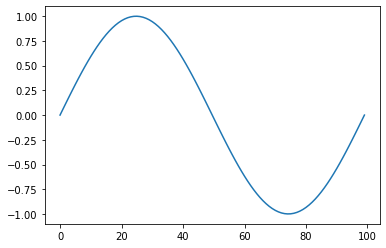

In [58]:
x = np.linspace(0, 2*np.pi, 100)
plt.plot(np.sin(x));
# oh regardez comment on applique la fonction np.sin à tout x d'un coup !
# (on y reviendra bien sûr)

## tableau de valeurs aléatoires

### entières `numpy.random.randint`

Cette fonction va retourner un nombre entier tiré aléatoirement entre deux bornes (la seconde est exclue).

In [59]:
np.random.randint(0, 10)

7

Si vous ne spécifiez qu'une borne les entiers seront générés entre 0 et la borne.

In [60]:
np.random.randint(10)

2

Pour générer plusieurs valeurs, vous pouvez donner une forme qui s'appelle `size` (et **pas** `shape`).

In [61]:
np.random.randint(10, size=(2, 3, 2, 2))

array([[[[8, 1],
         [0, 6]],

        [[3, 7],
         [3, 9]],

        [[7, 2],
         [9, 8]]],


       [[[3, 9],
         [3, 2]],

        [[7, 3],
         [7, 1]],

        [[1, 8],
         [5, 2]]]])

### flottantes `numpy.random.randn`

renvoie des échantillons de la loi normale univariée de moyenne 0 et de variance 1

par défault un seul float est retourné:

In [62]:
np.random.randn()

1.2810030185536514

vous pouvez préciser la forme de la sortie:

In [63]:
np.random.randn(2, 3, 4)

array([[[ 1.73227699, -0.06401274,  1.26929066, -0.86790455],
        [-0.83358159,  0.92451601, -0.56661828,  0.46206094],
        [ 0.69134936,  0.67521592, -0.6526918 ,  0.71740919]],

       [[-1.52307536,  1.4479264 ,  0.2199504 ,  1.55806361],
        [-0.17666828,  0.88864134, -0.10073757,  2.19917711],
        [ 0.63058804,  0.38371219, -0.61200314,  0.84604371]]])

À repousser plutôt en fin de séance sur `numpy`

## quiz

considérons le tableau `np.array([[1, 2, 3], [ 4, 5, 6]])`
   - quel est le type de ses éléments (sur un ordi récent) ? `int8`, `int32` ou `int64`

Qu'obtient-on si on fait:
   - `np.arange(1, 3)` ? `[1, 2, 3]` ou `[1, 2]` 
   - `np.arange(1, 5, -1)` ? `[5, 4, 3, 2]` ou `[]` 
   - `np.arange(3, 1, -1)` ? `[3, 2]` ou `[3, 2, 1]`

Qu'obtient-on si on fait:
   - `np.linspace(1, 3, 3)` ? `[1., 2., 3.]` ou `[1, 2]`)
   - `np.linspace(1, 2, 5)` ? `[1., 1.25, 1.5, 1.75, 2.]` ou `[1., 1.2, 1.4, 1.6, 1.8, 2.]`

Que vaut `d` si on fait:
   - `d = np.array(['un', 'deux', 'trois'])`
   - `d[0] = 'quatre'`
   
Est-ce  `['quatre', 'deux', 'trois']` ? `oui` ou `non`

Qu'est-ce la méthode `itemsize` d'un `np.ndarray` ?
   - `le nombre d'éléments` ou `la taille du tableau` ou `la taille d'un élément`

## Exercices

### comparaison des tailles mémoire d'une liste Python et d'un `ndarray`

Utiliser la fonction `getsizeof` de la librarie `sys` de Python pour afficher la taille d'une liste Python de 1.000 entiers initialisés de 0 à 999 et d'un ndarray de la même série de nombres.

In [64]:
# votre code ici

In [65]:
# votre code ici

Que constatez-vous ?

### génération aléatoire avec affichage couleur

Utilisez la fonction `numpy.random.randint(min, max, size, dtype)` pour construire une toute petite image de taille 10 pixels de côtés, en format RBG (i.e. où chaque pixel aura 3 valeurs) ,  que vous initialisez avec des entiers générés aléatoirement entre 0 et 255-inclus


un `TypeError: Invalid shape (d0, d1, d2) for image data` vous signalera que vous avez donné une mauvaise `shape` à votre image.

Quel est le plus petit type entier qui contient tous ces nombres ?

In [66]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np # au cas où vous commencez par cet exercice on importe numpy sinon ca ne fait rien

Avec la fonction `plt.imshow`  afficher l'image !

Vous allez obtenir, une image un peu comme celle-là (Que c'est joli !)

<img src='./media/joli-img-RGB-10.png'>

In [67]:
# votre code ici